In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [3]:
df = pd.read_csv('/Users/raj/Desktop/Healthcare Analytics Project/data/raw/train_data.csv')

In [3]:
df.shape

(318438, 18)

In [16]:
def missing_values_percentage(df):
    missingvalues_percentage = df.isnull().sum()/len(df)
    missingvalues_percentage = missingvalues_percentage*100
    missingvalues_percentage= missingvalues_percentage.sort_values(ascending=False)
    return missingvalues_percentage

In [17]:
missing_values_percentage(df)

City_Code_Patient                    1.423197
Bed Grade                            0.035486
Hospital_code                        0.000000
Admission_Deposit                    0.000000
Age                                  0.000000
Visitors with Patient                0.000000
Severity of Illness                  0.000000
Type of Admission                    0.000000
patientid                            0.000000
case_id                              0.000000
Ward_Facility_Code                   0.000000
Ward_Type                            0.000000
Department                           0.000000
Available Extra Rooms in Hospital    0.000000
Hospital_region_code                 0.000000
City_Code_Hospital                   0.000000
Hospital_type_code                   0.000000
Stay                                 0.000000
dtype: float64

In [22]:
print(df['City_Code_Patient'].dtype)
print(df['Bed Grade'].dtype)

float64
float64


In [23]:
df.dtypes

case_id                                int64
Hospital_code                          int64
Hospital_type_code                    object
City_Code_Hospital                     int64
Hospital_region_code                  object
Available Extra Rooms in Hospital      int64
Department                            object
Ward_Type                             object
Ward_Facility_Code                    object
Bed Grade                            float64
patientid                              int64
City_Code_Patient                    float64
Type of Admission                     object
Severity of Illness                   object
Visitors with Patient                  int64
Age                                   object
Admission_Deposit                    float64
Stay                                  object
dtype: object

In [26]:
df['Age'].value_counts()

41-50     63749
31-40     63639
51-60     48514
21-30     40843
71-80     35792
61-70     33687
11-20     16768
81-90      7890
0-10       6254
91-100     1302
Name: Age, dtype: int64

In [27]:
df['Stay'].value_counts()

21-30                 87491
11-20                 78139
31-40                 55159
51-60                 35018
0-10                  23604
41-50                 11743
71-80                 10254
More than 100 Days     6683
81-90                  4838
91-100                 2765
61-70                  2744
Name: Stay, dtype: int64

In [28]:
df['Stay'].describe()

count     318438
unique        11
top        21-30
freq       87491
Name: Stay, dtype: object

In [30]:
df.describe()

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit
count,318438.000000,318438.000000,318438.000000,318438.000000,318325.000000,318438.000000,313906.000000,318438.000000,318438.000000
mean,159219.500000,18.318841,4.771717,3.197627,2.625807,65747.579472,7.251859,3.284099,4880.749392
std,91925.276848,8.633755,3.102535,1.168171,0.873146,37979.936440,4.745266,1.764061,1086.776254
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1800.000000
25%,79610.250000,11.000000,2.000000,2.000000,2.000000,32847.000000,4.000000,2.000000,4186.000000
50%,159219.500000,19.000000,5.000000,3.000000,3.000000,65724.500000,8.000000,3.000000,4741.000000
75%,238828.750000,26.000000,7.000000,4.000000,3.000000,98470.000000,8.000000,4.000000,5409.000000
max,318438.000000,32.000000,13.000000,24.000000,4.000000,131624.000000,38.000000,32.000000,11008.000000


In [31]:
df = df.astype({'case_id':str, 'Hospital_code':str, 'City_Code_Hospital':str, 'patientid':str, 'City_Code_Patient':str,})

In [33]:
df.dtypes

case_id                               object
Hospital_code                         object
Hospital_type_code                    object
City_Code_Hospital                    object
Hospital_region_code                  object
Available Extra Rooms in Hospital      int64
Department                            object
Ward_Type                             object
Ward_Facility_Code                    object
Bed Grade                            float64
patientid                             object
City_Code_Patient                     object
Type of Admission                     object
Severity of Illness                   object
Visitors with Patient                  int64
Age                                   object
Admission_Deposit                    float64
Stay                                  object
dtype: object

In [40]:
df['Severity of Illness'].value_counts()

Moderate    175843
Minor        85872
Extreme      56723
Name: Severity of Illness, dtype: int64

In [38]:
df_numeric = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = df_numeric.corr()

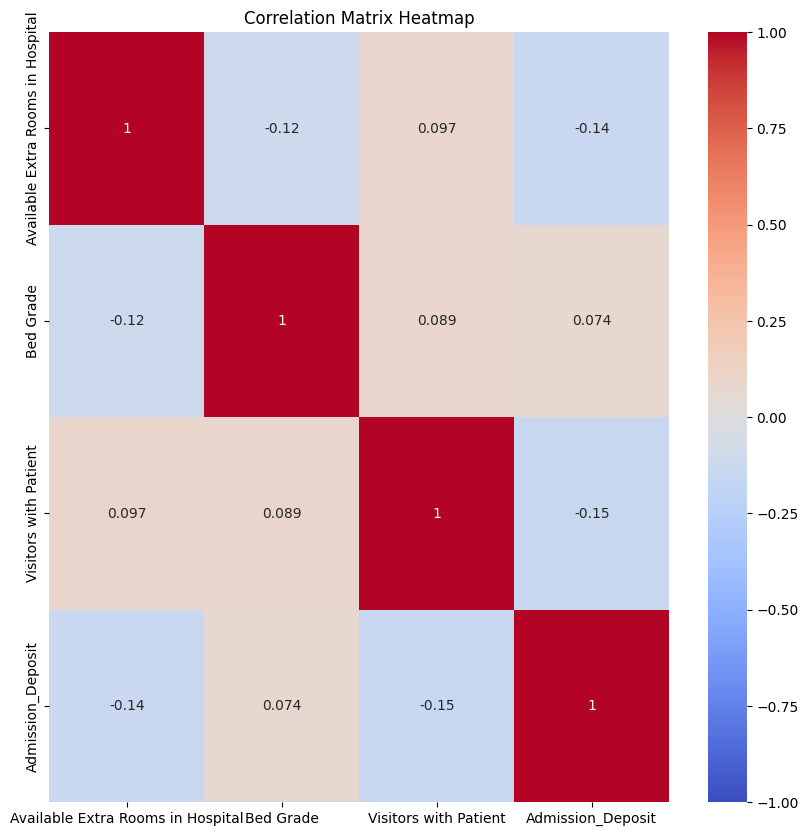

In [44]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

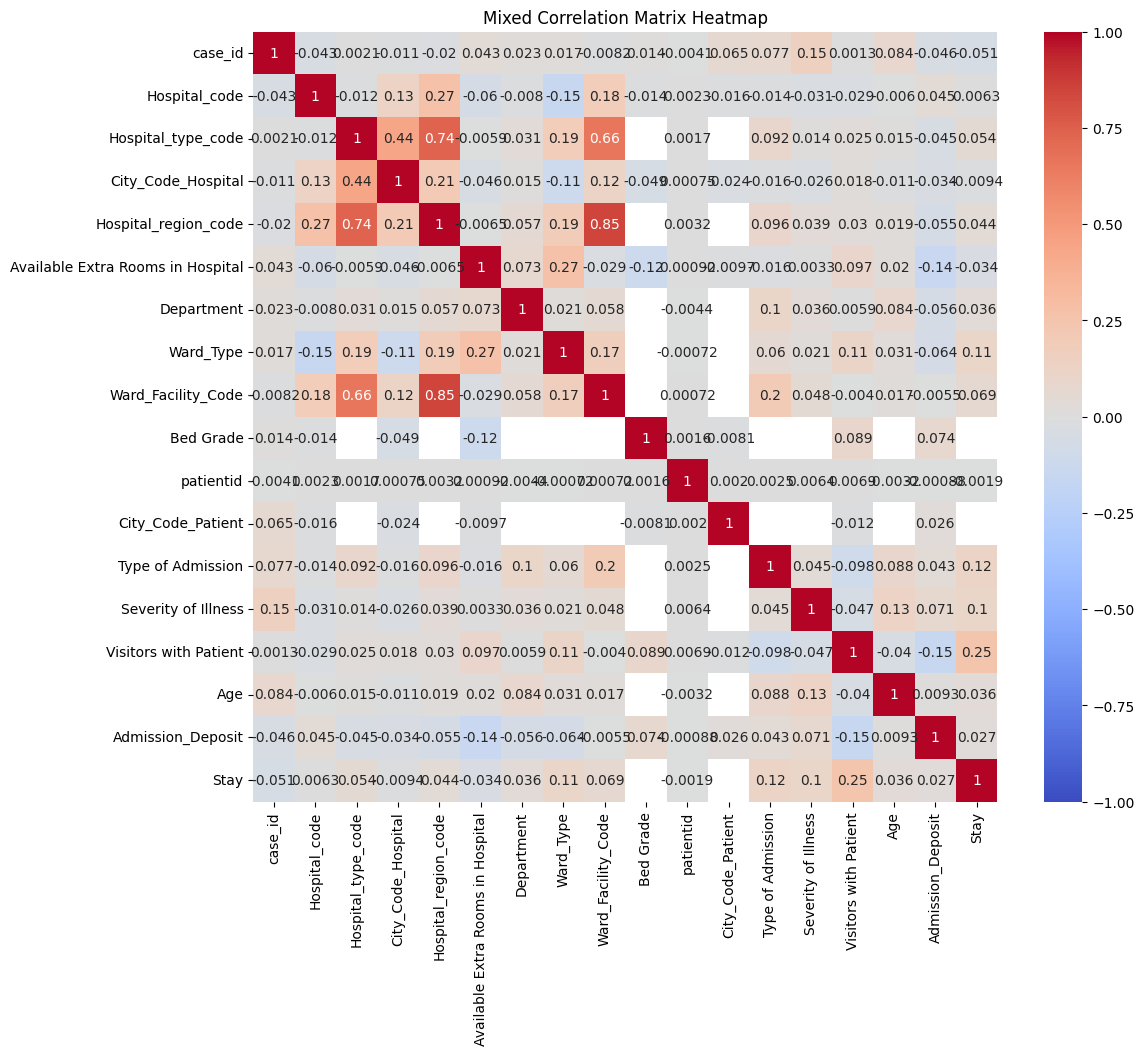

In [4]:
def cramers_v(confusion_matrix):
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))

def mixed_correlation(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    categorical_cols = df.select_dtypes(exclude=[np.number]).columns
    
    correlations = pd.DataFrame(index=df.columns, columns=df.columns, dtype=float)
    
    # Numeric-numeric correlations
    num_corr = df[numeric_cols].corr()
    correlations.loc[numeric_cols, numeric_cols] = num_corr
    
    # Categorical-categorical correlations
    for col1 in categorical_cols:
        for col2 in categorical_cols:
            if col1 <= col2:
                confusion_matrix = pd.crosstab(df[col1], df[col2])
                corr = cramers_v(confusion_matrix)
                correlations.loc[col1, col2] = correlations.loc[col2, col1] = corr
    
    # Categorical-numeric correlations
    for cat_col in categorical_cols:
        cat_codes = df[cat_col].factorize()[0]
        for num_col in numeric_cols:
            corr = stats.pointbiserialr(cat_codes, df[num_col])[0]
            correlations.loc[cat_col, num_col] = correlations.loc[num_col, cat_col] = corr
    
    return correlations

# Calculate mixed correlation matrix
corr_matrix = mixed_correlation(df)

# Create heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Mixed Correlation Matrix Heatmap')
plt.show()

In [ ]:
'''We see that there's correlation between a lot of the code variables, i.e. hospital code/ city code
it makes sense to only keep on of these variables and drop the rest to reduce dimensionality. 
Keeping hospital_region_code and dropping the rest'''
'''we also need to drop the variables that only serve as IDs: 
'''